<a href="https://colab.research.google.com/github/amanjaiswalofficial/machine-learning-engineer-projects/blob/main/HOML/02_Performance_Measure_MAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing

# 1. Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # House prices in $100,000s

# 2. Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features (important for regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = model.predict(X_test_scaled)

# 6. Compute MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.5332


The above shows us that our model's prediction are off by $53360.

If MAE was higher, the model would be making larger errors.

If MAE was lower, the model would be making more accurate predictions.

### In a nutshell
It helps us measure and improve the accuracy of our machine learning model.

If the MAE is low, the model is performing well. If it's high, we need to improve it.

Less sensitive to outliers: Unlike MSE (Mean Squared Error), it doesn't heavily penalize large errors

Mostly used for regression problems

### Comparison b/w models using MAE / Mean Absolute Error

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing

# 1. Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # House prices in $100,000s

# 2. Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# 5. Train & evaluate each model
mae_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results[name] = mae
    print(f"{name}: MAE = {mae:.4f}")

# 6. Find the best model
best_model = min(mae_results, key=mae_results.get)
print(f"\nBest Model: {best_model} with MAE = {mae_results[best_model]:.4f}")

Linear Regression: MAE = 0.5332
Decision Tree: MAE = 0.4546
Random Forest: MAE = 0.3274
Gradient Boosting: MAE = 0.3717

Best Model: Random Forest with MAE = 0.3274


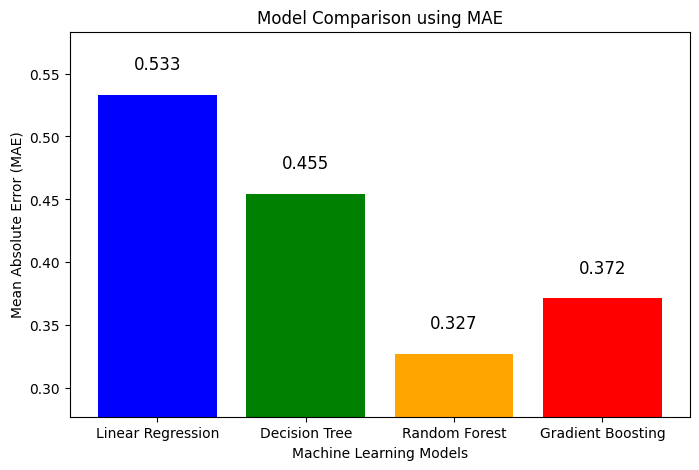

In [ ]:
import matplotlib.pyplot as plt

# Plot MAE values for each model
plt.figure(figsize=(8, 5))
plt.bar(mae_results.keys(), mae_results.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Machine Learning Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison using MAE")
plt.ylim(min(mae_results.values()) - 0.05, max(mae_results.values()) + 0.05)

# Show values on bars
for i, v in enumerate(mae_results.values()):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=12)

plt.show()


#### MAE vs RMSE

Use MAE when you care about average error in the same units as the target (e.g., dollars, temperature).

Use RMSE when large errors are more problematic (e.g., in financial predictions, where big mistakes can be costly).

---

If RMSE is much higher than MAE → The model makes some big mistakes (outliers).

If RMSE is close to MAE → Errors are more evenly spread out.

Linear Regression: MAE = 0.5332, RMSE = 0.7456
Decision Tree: MAE = 0.4526, RMSE = 0.7030
Random Forest: MAE = 0.3274, RMSE = 0.5051
Gradient Boosting: MAE = 0.3717, RMSE = 0.5422


<ipython-input-4-5107330032ac>:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(mae_results.keys(), rotation=20)
<ipython-input-4-5107330032ac>:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(rmse_results.keys(), rotation=20)


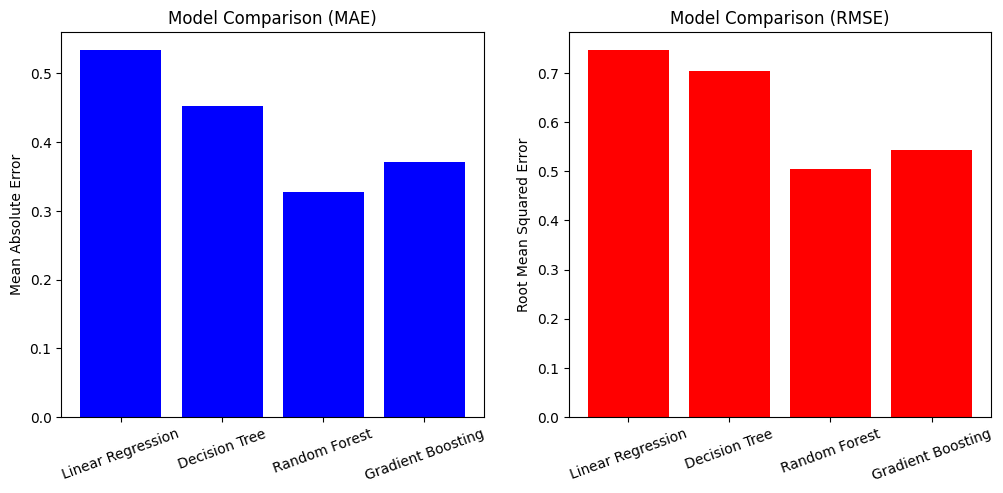

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

# 1. Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # House prices in $100,000s

# 2. Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# 5. Train & evaluate each model using MAE and RMSE
mae_results = {}
rmse_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_results[name] = mae
    rmse_results[name] = rmse

    print(f"{name}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")

# 6. Plot comparison of MAE & RMSE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(mae_results.keys(), mae_results.values(), color='blue')
ax[0].set_title("Model Comparison (MAE)")
ax[0].set_ylabel("Mean Absolute Error")
ax[0].set_xticklabels(mae_results.keys(), rotation=20)

ax[1].bar(rmse_results.keys(), rmse_results.values(), color='red')
ax[1].set_title("Model Comparison (RMSE)")
ax[1].set_ylabel("Root Mean Squared Error")
ax[1].set_xticklabels(rmse_results.keys(), rotation=20)

plt.show()

### Using k-fold cross validation for better performance and lesser MAE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # House prices in $100,000s

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_val_score to compute MAE across K folds
mae_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=make_scorer(mean_absolute_error))

# Compute average MAE
mean_mae = np.mean(mae_scores)

# Print results
print(f"MAE from each fold: {mae_scores}")
print(f"Average MAE: {mean_mae:.4f}")

MAE from each fold: [0.32817422 0.33173655 0.326316   0.3172705  0.33555398]
Average MAE: 0.3278


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split data (without K-Fold)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & calculate MAE
y_pred = rf.predict(X_test)
mae_without_kfold = mean_absolute_error(y_test, y_pred)

print(f"MAE Without K-Fold: {mae_without_kfold:.4f}")


MAE Without K-Fold: 0.3276


In [ ]:
mae_scores = cross_val_score(rf, X_scaled, y, cv=kf, scoring=make_scorer(mean_absolute_error))

# Compute average MAE
mae_with_kfold = np.mean(mae_scores)

print(f"MAE With K-Fold: {mae_with_kfold:.4f}")

MAE With K-Fold: 0.3278


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # House prices in $100,000s

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

# Use GridSearchCV for hyperparameter tuning with K-Fold
grid_search = GridSearchCV(rf, param_grid, cv=kf, scoring=make_scorer(mean_absolute_error), n_jobs=-1, verbose=1)
grid_search.fit(X_scaled, y)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Compute final MAE
final_mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Final MAE after Hyperparameter Tuning: {final_mae:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Final MAE after Hyperparameter Tuning: 0.3679
